In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import itertools
from collections import defaultdict

In [3]:
models1 = ["bert", "roberta"]
models2 = ["distilgpt", "gpt2", "gpt"]
models3 = ["llama2-7b", "tinyllama", "mistral7b"]

In [4]:
def objective(x, a, b, c):
    return a * x + b * x ** 2 + c


def polynomial_best_fit(x, y):
    popt, _ = curve_fit(objective, x, y)
    a, b, c = popt
    x_line = np.arange(min(x), max(x), 1)

    y_line = objective(x_line, a, b, c)

    return x_line, y_line

In [5]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [ ]:
def plotter(models, title, id=0, type="fro", random=False):
    plt.figure()
    plt.xlabel("N" , fontsize=16)
    plt.ylabel("Norm", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xscale("log")
    plt.yscale("log")

    plt.title(title, fontsize=14)
    
    x_min = None
    x_max = None
    x_mid = None
    y_mid = None

    for i, name in enumerate(models):
        if random:
            data_arr = np.load(f"./data_files/{name}_random_data.npy")
        else:
            data_arr = np.load(f"./data_files/{name}_data.npy")

        if type == "fro":
            y = data_arr[:, 1]
        else:
            y = data_arr[:, 3]

        x_test, y_test = polynomial_best_fit(data_arr[:, 0], y)
        plt.scatter(data_arr[:, 0], y, label=name, s=4, c=colors[i + 1], alpha=0.2)
        #plt.plot(x_test, y_test, c=colors[i + 1])

        if i == 0:
            # add the first model as the reference points for the dotted line
            x_min = x_test[0]
            x_max = x_test[-1]
            x_mid = x_test[len(x_test) // 2]
            y_mid = y_test[len(y_test) // 2]
    
    x = [x_min, x_max]
    y = np.sqrt(x) / np.sqrt(x_mid) * y_mid * 2
    plt.plot(x, y, label=r"$y \propto \sqrt{x}$", linestyle="--")

    plt.legend(fontsize=16)
    
    prefix = {True: "random", False: "MMLU"}
    plt.savefig(f'./images/{prefix[random]}_{type}_{id}.pdf')

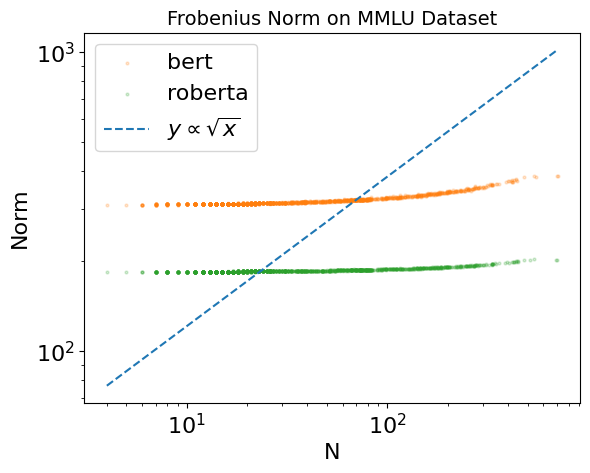

In [40]:
plotter(models1, "Frobenius Norm on MMLU Dataset", 1, "fro", False)

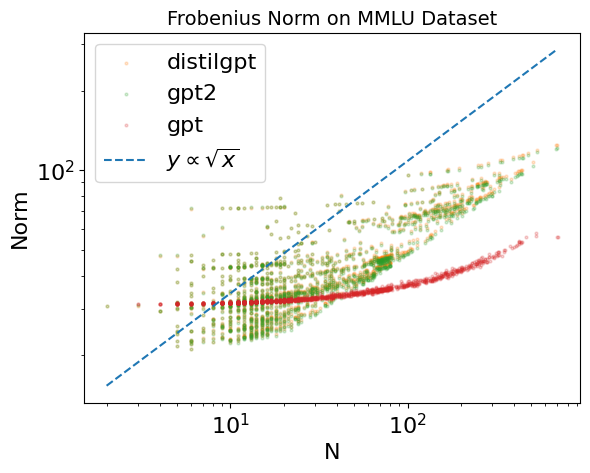

In [41]:
plotter(models2, "Frobenius Norm on MMLU Dataset", 2, "fro", False)

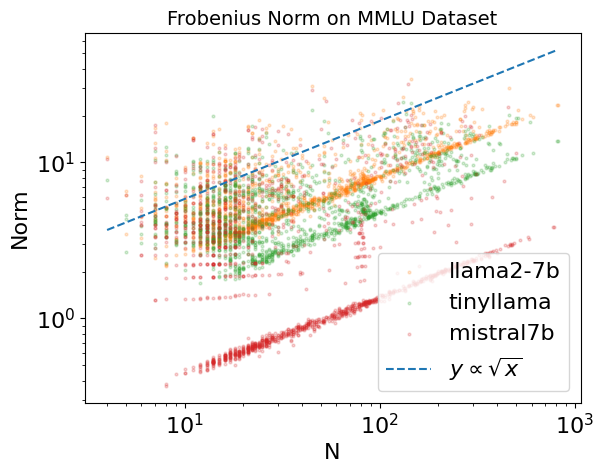

In [42]:
plotter(models3, "Frobenius Norm on MMLU Dataset", 3, "fro", False)

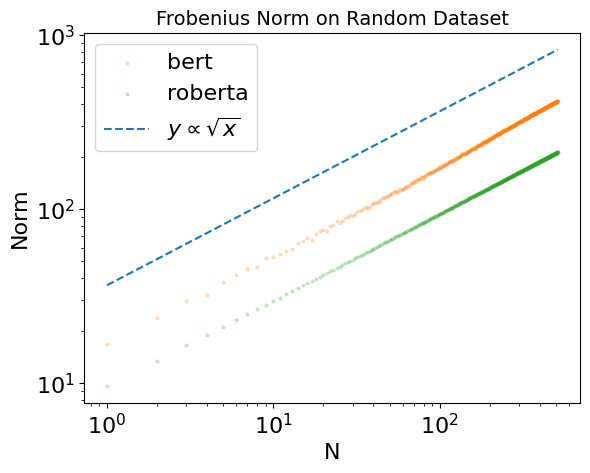

In [43]:
plotter(models1, "Frobenius Norm on Random Dataset", 1, "fro", True)

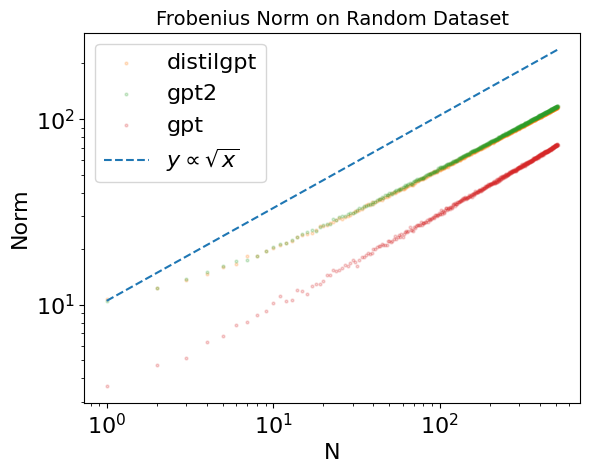

In [44]:
plotter(models2, "Frobenius Norm on Random Dataset", 2, "fro", True)

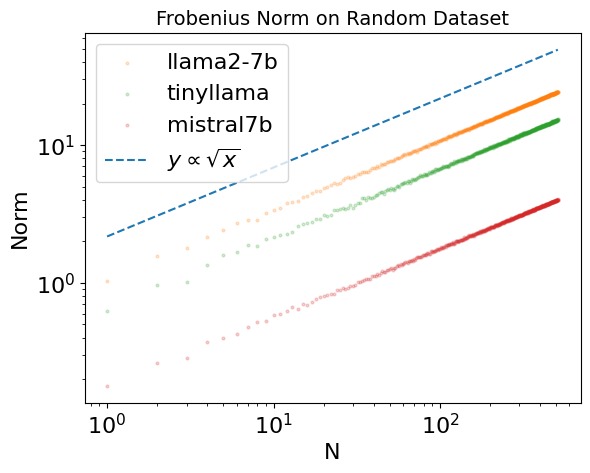

In [45]:
plotter(models3, "Frobenius Norm on Random Dataset", 3, "fro", True)

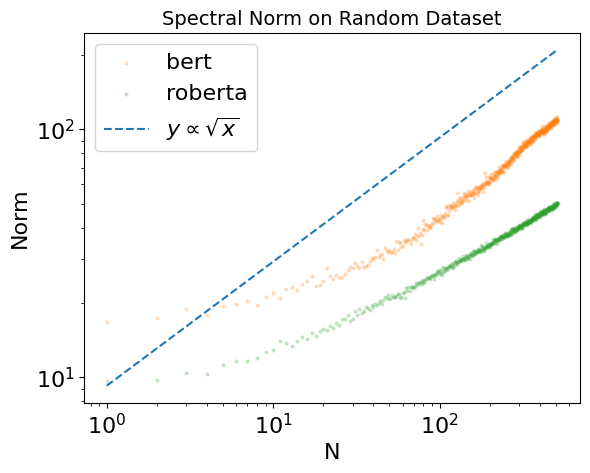

In [46]:
plotter(models1, "Spectral Norm on Random Dataset", 1, "spec", True)

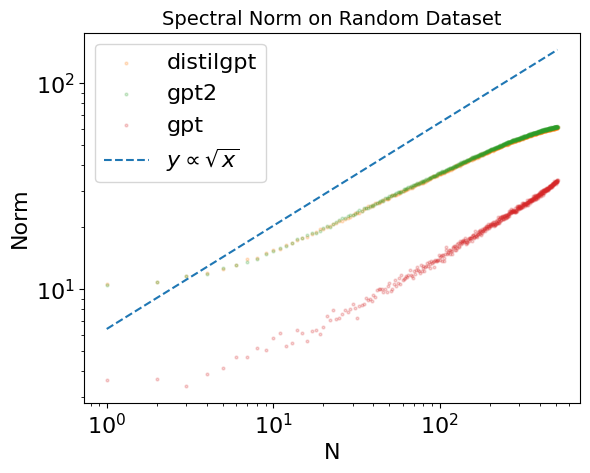

In [47]:
plotter(models2, "Spectral Norm on Random Dataset", 2, "spec", True)

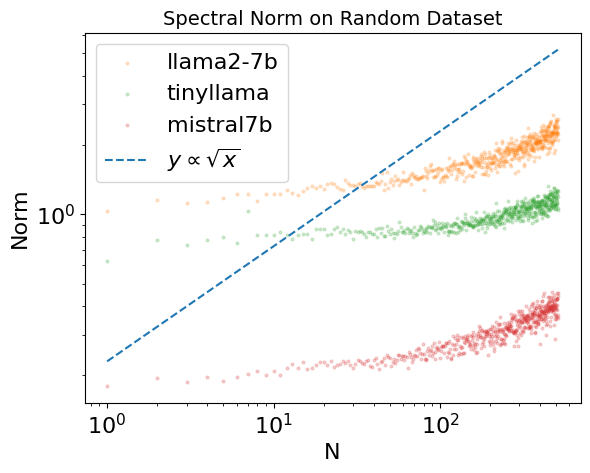

In [48]:
plotter(models3, "Spectral Norm on Random Dataset", 3, "spec", True)

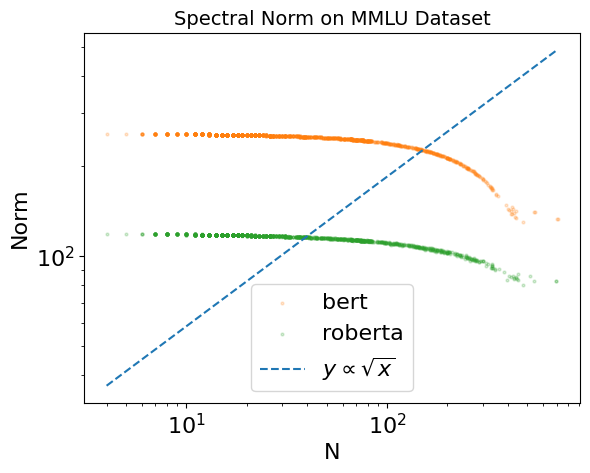

In [49]:
plotter(models1, "Spectral Norm on MMLU Dataset", 1, "spec", False)

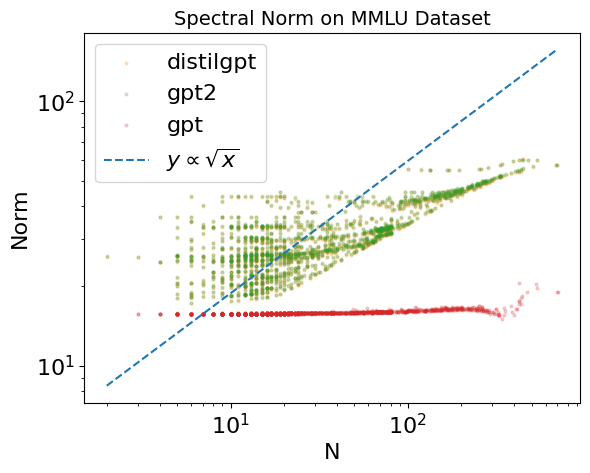

In [50]:
plotter(models2, "Spectral Norm on MMLU Dataset", 2, "spec", False)

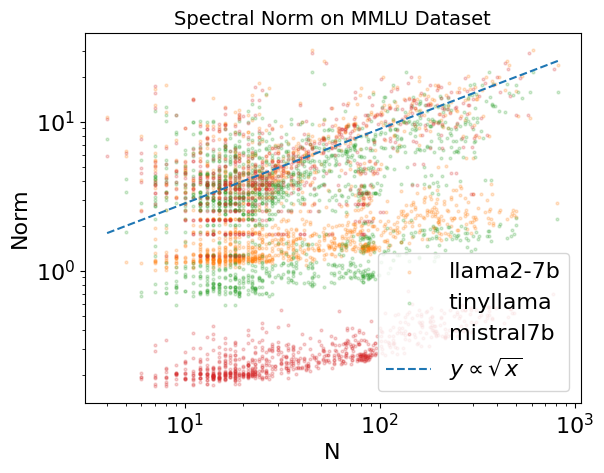

In [51]:
plotter(models3, "Spectral Norm on MMLU Dataset", 3, "spec", False)

In [ ]:
# combined
def plotter(random=False):
    palette = itertools.cycle(sns.color_palette("husl", n_colors=8))
    mpl.rcParams.update({'font.size': 12})
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
    
    for i in range(3):
        axes[1, i].set_xlabel("Sentence Length $N$" , fontsize=16)
    
    
    axes[0, 0].set_ylabel("Frobenius Norm", fontsize=16)
    axes[1, 0].set_ylabel("Spectral Norm", fontsize=16)
    
    for i in range(2):
        for j in range(3):
            # axes[i, j].set_xticks(fontsize=16)
            # axes[i, j].set_yticks(fontsize=16)
            axes[i, j].set_xscale("log")
            axes[i, j].set_yscale("log")

    x_min = None
    x_max = None
    x_mid = None
    y_mid = None

    models1 = ["bert", "roberta"]
    models2 = ["distilgpt", "gpt2", "gpt"]
    models3 = ["llama2-7b", "tinyllama", "mistral7b"]

    key_dict = defaultdict(int)


    all_models = [models1, models2, models3]
    counter = 0
    for models in all_models:
        for model in models:
            key_dict[model] = counter
            counter += 1

    types = ['fro', 'spec']

    for i, type in enumerate(types):
        for j, models in enumerate(all_models):
            curr_ax = axes[i,j]
            for k, name in enumerate(models):
                if random:
                    data_arr = np.load(f"./data_files/{name}_random_data.npy")
                else:
                    data_arr = np.load(f"./data_files/{name}_data.npy")

                if type == "fro":
                    y = data_arr[:, 1]
                else:
                    y = data_arr[:, 3]

                x_test, y_test = polynomial_best_fit(data_arr[:, 0], y)
                if k == 0:
                    # add the first model as the reference points for the dotted line
                    x_min = x_test[0]
                    x_max = x_test[-1]
                    x_mid = x_test[len(x_test) // 2]
                    y_mid = y_test[len(y_test) // 2]
                    
                    x_line = [x_min, x_max]
                    y_line = np.sqrt(x_line) / np.sqrt(x_mid) * y_mid * 2
                    if i == 0 and j == 0:
                        curr_ax.plot(x_line, y_line, label=r"$y \propto \sqrt{x}$", linestyle="--")
                    else:
                        curr_ax.plot(x_line, y_line, linestyle="--")
                        
                if type == 'fro':
                    axes[i,j].scatter(data_arr[:, 0], y, label=name, s=4, c=next(palette), alpha=0.2)
                else:
                    axes[i,j].scatter(data_arr[:, 0], y, s=4, c=next(palette), alpha=0.2) 
                #plt.plot(x_test, y_test, c=colors[i + 1])
            curr_ax.legend([], [], frameon=False)     

    # plt.legend(fontsize=16)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    leg = fig.legend(lines, labels, loc='upper center', ncols=9, markerscale=3)

    for lh in leg.legend_handles:
        lh.set_alpha(1)
    
    prefix = {True: "random", False: "MMLU"}
    plt.savefig(f'./images/{prefix[random]}.pdf', format="pdf", bbox_inches="tight")
    plt.show()



C:\Users\eyesfrog\AppData\Local\Temp\ipykernel_19564\4143284458.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i,j].scatter(data_arr[:, 0], y, label=name, s=4, c=next(palette), alpha=0.2)
C:\Users\eyesfrog\AppData\Local\Temp\ipykernel_19564\4143284458.py:74: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i,j].scatter(data_arr[:, 0], y, s=4, c=next(palette), alpha=0.2)


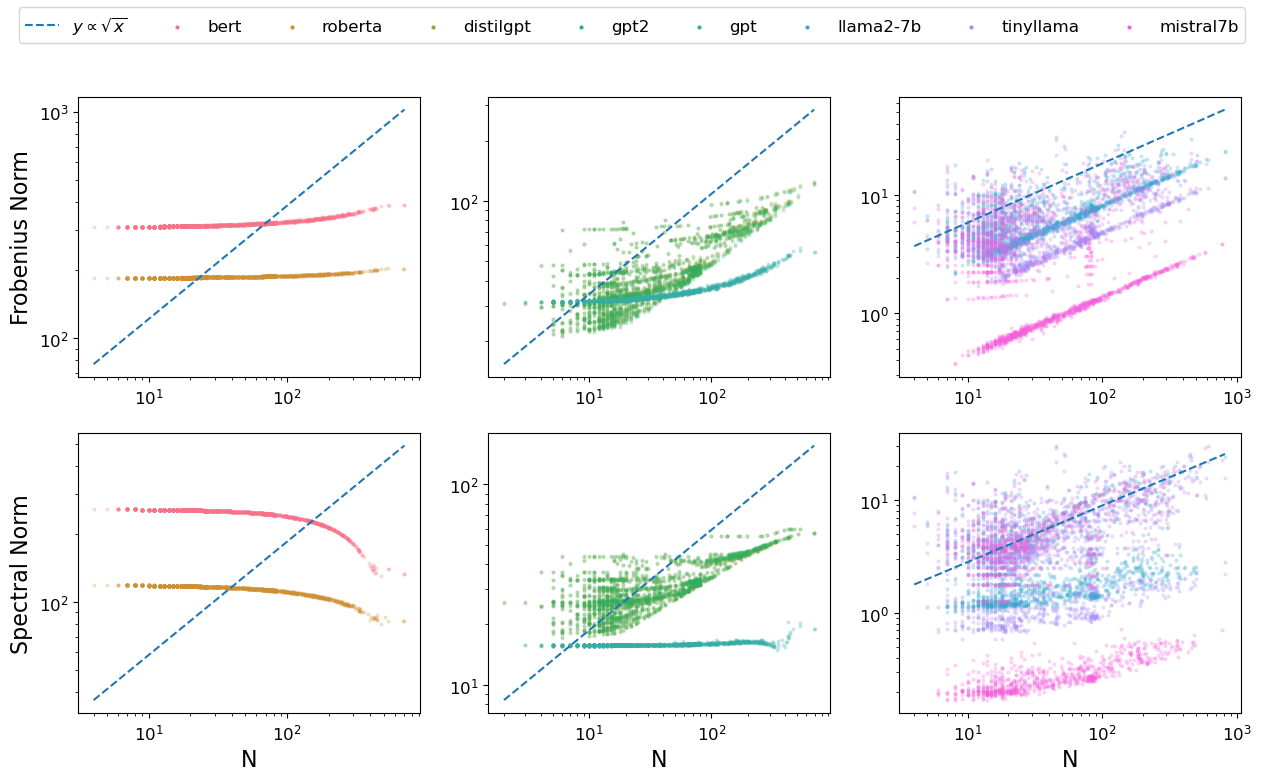

In [444]:
plotter(False)

C:\Users\eyesfrog\AppData\Local\Temp\ipykernel_19564\4143284458.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i,j].scatter(data_arr[:, 0], y, label=name, s=4, c=next(palette), alpha=0.2)
C:\Users\eyesfrog\AppData\Local\Temp\ipykernel_19564\4143284458.py:74: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[i,j].scatter(data_arr[:, 0], y, s=4, c=next(palette), alpha=0.2)


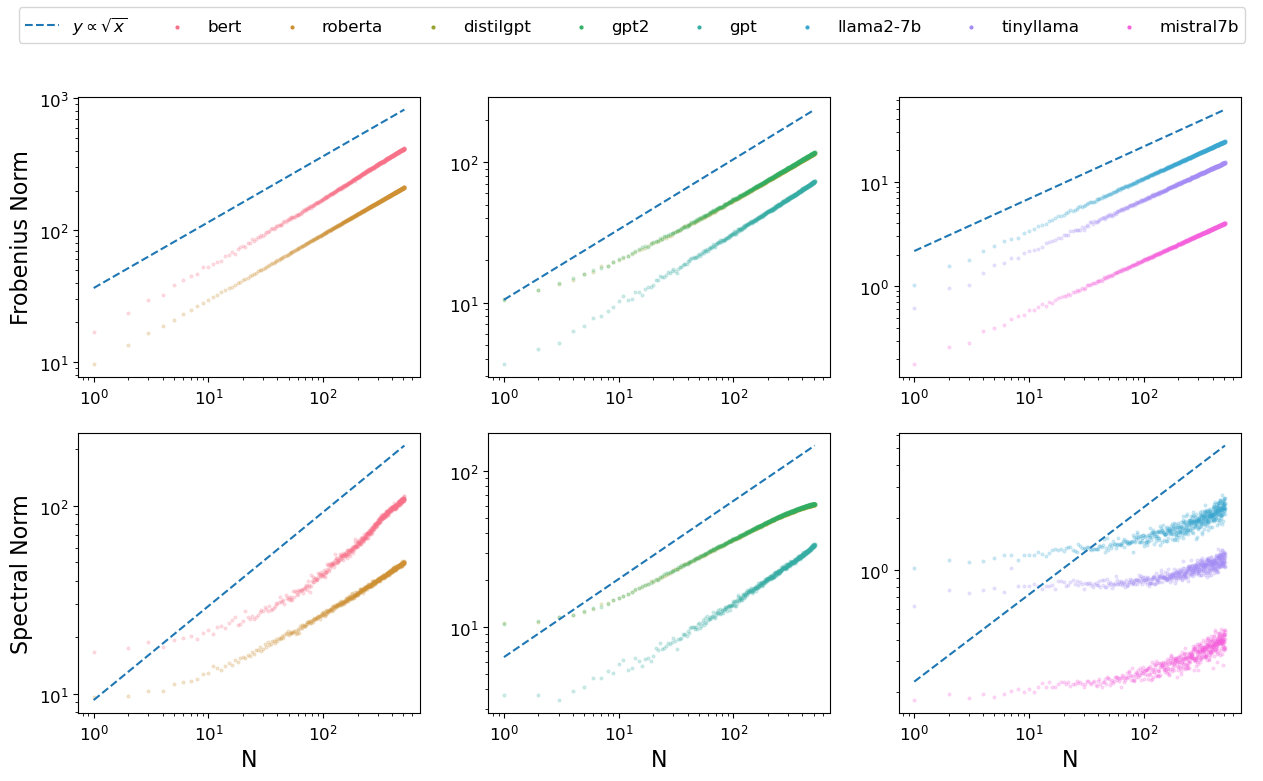

In [445]:
plotter(True)